<a href="https://colab.research.google.com/github/SAJAD-52/Build-Machine-learning-models-on-Airbnb-Dataset/blob/master/Breast_cancer_tumor_classification_using_multiples_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('Breast_cancer_data.csv')

In [ ]:
data.head

<bound method NDFrame.head of      mean_radius  mean_texture  ...  mean_smoothness  diagnosis
0          17.99         10.38  ...          0.11840          0
1          20.57         17.77  ...          0.08474          0
2          19.69         21.25  ...          0.10960          0
3          11.42         20.38  ...          0.14250          0
4          20.29         14.34  ...          0.10030          0
..           ...           ...  ...              ...        ...
564        21.56         22.39  ...          0.11100          0
565        20.13         28.25  ...          0.09780          0
566        16.60         28.08  ...          0.08455          0
567        20.60         29.33  ...          0.11780          0
568         7.76         24.54  ...          0.05263          1

[569 rows x 6 columns]>

In [ ]:
data.shape

(569, 6)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


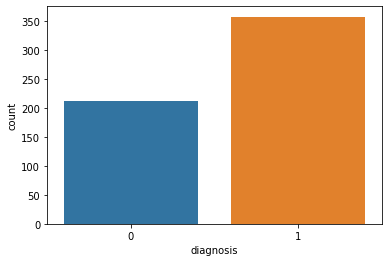

In [ ]:
sns.countplot(data['diagnosis'])

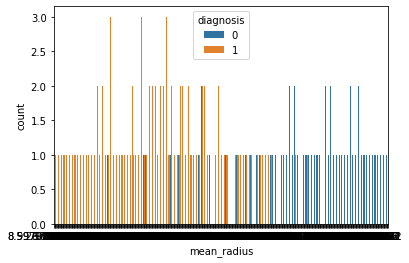

In [ ]:
sns.countplot(x='mean_radius', hue='diagnosis', data=data)

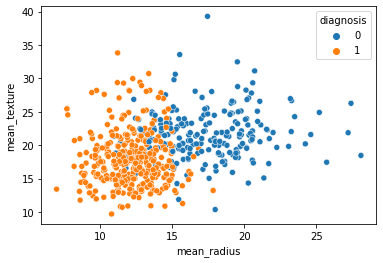

In [ ]:
sns.scatterplot(x='mean_radius', y='mean_texture', hue='diagnosis', data=data)

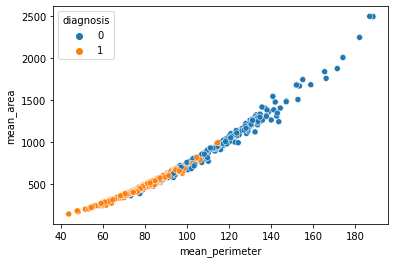

In [ ]:
sns.scatterplot(x='mean_perimeter', y='mean_area', hue='diagnosis', data=data)

In [ ]:
sns.boxenplot(x='diagnosis', y='mean_area', data=data)

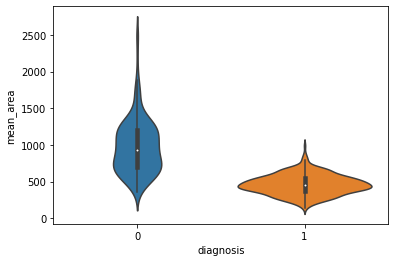

In [ ]:
sns.violinplot(x='diagnosis', y='mean_area', data=data, size=8)

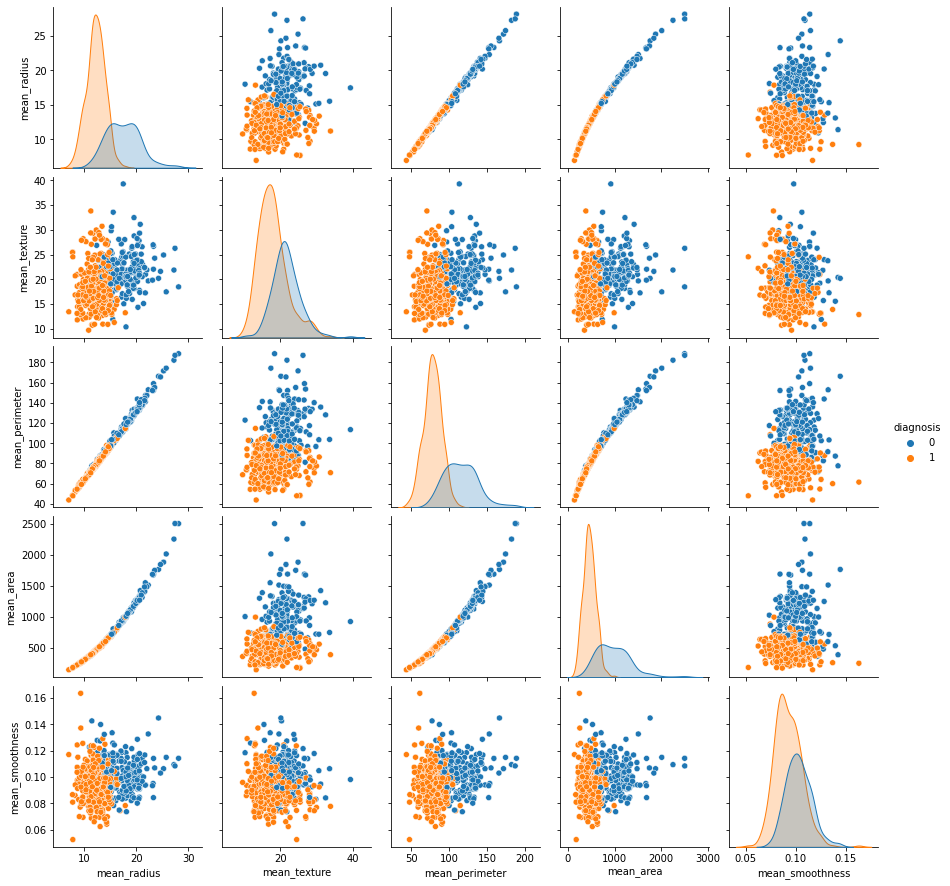

In [ ]:
sns.pairplot(data, hue='diagnosis', vars=['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness'])

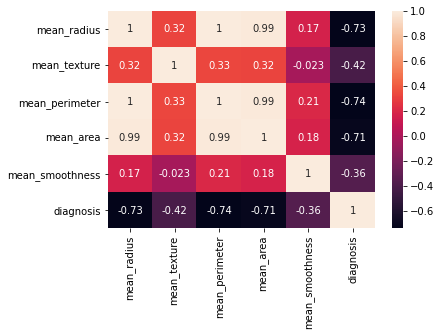

In [ ]:
sns.heatmap(data.corr(), annot=True)

In [ ]:
#data preprocessing
dataF = pd.DataFrame(data=data, columns=['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness', 'diagnosis'])

In [ ]:
X =  dataF.drop(['diagnosis'], axis=1)

In [ ]:
Y = dataF['diagnosis']

In [ ]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
X

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030
...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100
565,20.13,28.25,131.20,1261.0,0.09780
566,16.60,28.08,108.30,858.1,0.08455
567,20.60,29.33,140.10,1265.0,0.11780


In [ ]:
Y.shape

(569,)

In [ ]:
X.shape

(569, 5)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=5)

In [ ]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
svc.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
Y_predict = svc.predict(X_test)

In [ ]:
cm = confusion_matrix(Y_test, Y_predict)

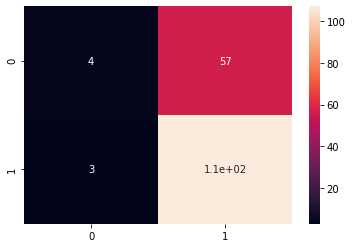

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.57      0.07      0.12        61
           1       0.65      0.97      0.78       110

    accuracy                           0.65       171
   macro avg       0.61      0.52      0.45       171
weighted avg       0.62      0.65      0.54       171



In [ ]:
print(metrics.accuracy_score(Y_test, Y_predict))

0.6491228070175439


In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [ ]:
x_train_scaler=min_max_scaler.fit_transform(X_train)
x_train_scaler

array([[0.30579574, 0.30267163, 0.3050394 , 0.18566342, 0.6861084 ],
       [0.26478581, 0.08657423, 0.25413925, 0.15428436, 0.40621266],
       [0.34581748, 0.33513696, 0.3422023 , 0.21647282, 0.57966764],
       ...,
       [0.53999704, 0.38248225, 0.5828212 , 0.4037503 , 0.76430976],
       [0.43475468, 0.44639838, 0.44761767, 0.30339426, 0.68285001],
       [0.14304066, 0.25566452, 0.13831249, 0.07211014, 0.61116542]])

In [ ]:
x_test_scaler=min_max_scaler.fit_transform(X_test)

In [ ]:
svc.fit(x_train_scaler, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_predit_scaler=svc.predict(x_test_scaler)

In [ ]:
cm_scaler=confusion_matrix(y_predit_scaler, Y_test)

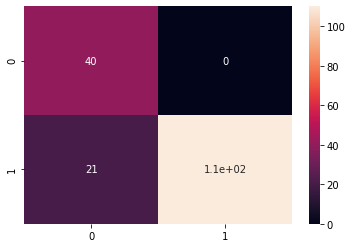

In [ ]:
sns.heatmap(cm_scaler, annot=True)

In [ ]:
print(classification_report(y_predit_scaler, Y_test))

              precision    recall  f1-score   support

           0       0.66      1.00      0.79        40
           1       1.00      0.84      0.91       131

    accuracy                           0.88       171
   macro avg       0.83      0.92      0.85       171
weighted avg       0.92      0.88      0.88       171



In [ ]:
print(metrics.accuracy_score(y_predit_scaler, Y_test))

0.8771929824561403


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=5)

In [ ]:
KNN.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_predict_knn = KNN.predict(X_test)

In [ ]:
cm_knn=confusion_matrix(y_predict_knn, Y_test)

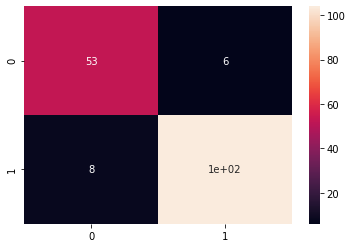

In [ ]:
sns.heatmap(cm_knn, annot=True)

In [ ]:
print(classification_report(y_predict_knn, Y_test))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        59
           1       0.95      0.93      0.94       112

    accuracy                           0.92       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171



In [ ]:
print(metrics.accuracy_score(y_predict_knn, Y_test))

0.9181286549707602


In [ ]:
accuracy_list = []
k_range=range(5,25)
for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, Y_train)
  predict_y=knn.predict(X_test)
  accuracy_list.append(metrics.accuracy_score(predict_y, Y_test))

In [ ]:
accuracy_list

[0.9181286549707602,
 0.8947368421052632,
 0.9122807017543859,
 0.9005847953216374,
 0.9298245614035088,
 0.9064327485380117,
 0.9298245614035088,
 0.9005847953216374,
 0.9239766081871345,
 0.9122807017543859,
 0.9239766081871345,
 0.9122807017543859,
 0.9181286549707602,
 0.9181286549707602,
 0.9239766081871345,
 0.9239766081871345,
 0.9239766081871345,
 0.9122807017543859,
 0.935672514619883,
 0.9181286549707602]

Text(0, 0.5, 'accuracy')

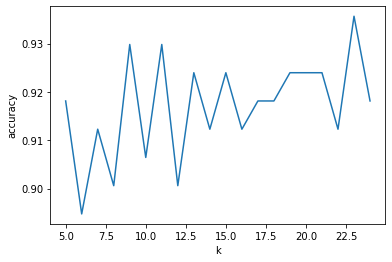

In [ ]:
plt.plot(k_range, accuracy_list)
plt.xlabel('k')
plt.ylabel('accuracy')

In [ ]:
max(accuracy_list)

0.935672514619883

In [ ]:
from sklearn.naive_bayes import GaussianNB
GB = GaussianNB()

In [ ]:
GB.fit(X_train, Y_train)
GB_predict = GB.predict(X_test)

In [ ]:
cm = confusion_matrix(GB_predict, Y_test)
cm

array([[ 51,   1],
       [ 10, 109]])

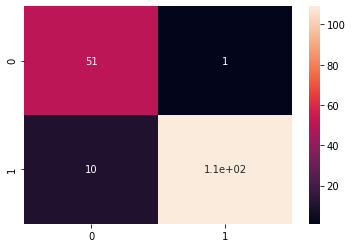

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
CR = classification_report(GB_predict, Y_test)
print(CR)

              precision    recall  f1-score   support

           0       0.84      0.98      0.90        52
           1       0.99      0.92      0.95       119

    accuracy                           0.94       171
   macro avg       0.91      0.95      0.93       171
weighted avg       0.94      0.94      0.94       171



In [ ]:
print(metrics.accuracy_score(GB_predict, Y_test))

0.935672514619883


In [ ]:
GB.fit(x_train_scaler, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_predict_GB_sclaer = GB.predict(x_test_scaler)

In [ ]:
CM = confusion_matrix(Y_test, y_predict_GB_sclaer)

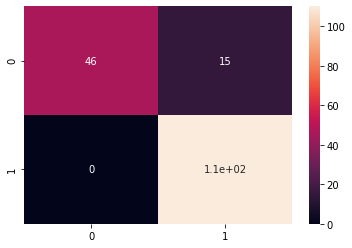

In [ ]:
sns.heatmap(CM, annot=True)

In [ ]:
print(classification_report(Y_test, y_predict_GB_sclaer))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        61
           1       0.88      1.00      0.94       110

    accuracy                           0.91       171
   macro avg       0.94      0.88      0.90       171
weighted avg       0.92      0.91      0.91       171



In [ ]:
print(metrics.accuracy_score(Y_test, y_predict_GB_sclaer))

0.9122807017543859


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
RF.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
RF_predict = RF.predict(X_test)

In [ ]:
cm = confusion_matrix(Y_test, RF_predict)

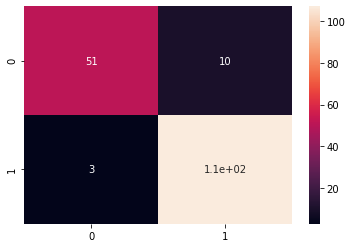

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(Y_test, RF_predict))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89        61
           1       0.91      0.97      0.94       110

    accuracy                           0.92       171
   macro avg       0.93      0.90      0.91       171
weighted avg       0.93      0.92      0.92       171



In [ ]:
print(metrics.accuracy_score(Y_test, RF_predict))

0.9239766081871345


In [ ]:
from sklearn.neural_network import MLPClassifier
MPL = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

In [ ]:
MPL.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
MPL_predict = MPL.predict(X_test)

In [ ]:
CM = confusion_matrix(MPL_predict, Y_test)

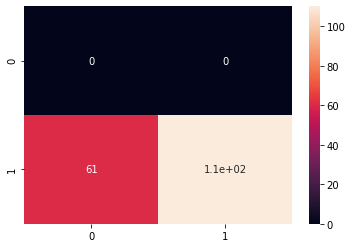

In [ ]:
sns.heatmap(CM, annot=True)

In [ ]:
print(classification_report(MPL_predict, Y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.64      0.78       171

    accuracy                           0.64       171
   macro avg       0.50      0.32      0.39       171
weighted avg       1.00      0.64      0.78       171



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(metrics.accuracy_score(MPL_predict, Y_test))

0.6432748538011696


In [ ]:
from sklearn.neural_network import MLPRegressor
REG = MLPRegressor(hidden_layer_sizes=10, activation='relu', solver='adam', alpha=0.0001, batch_size='auto', random_state=1, max_iter=500)

In [ ]:
REG.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=10, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=500,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
REG_pred = REG.predict(X_test)
REG_pred

array([ 1.16422653e+00,  1.40496422e+00, -7.51297252e-01,  1.21604401e+00,
        2.08841003e+00,  3.83222849e-01,  1.19629203e+00,  4.13496721e-01,
       -5.38540567e-01,  3.52556642e-01,  2.22693713e+00,  1.79883442e+00,
        8.46887454e-01,  2.69923049e+00, -5.14717533e-02,  5.56167201e-01,
        1.06141224e+00,  4.80198736e-01,  2.84444891e+00,  9.49365469e-01,
        8.10935031e-03,  9.80802884e-01, -1.92520094e-01,  8.18050390e-01,
        1.03271488e+00,  1.47006569e+00,  1.19994041e+00, -7.77175749e-02,
        7.06109206e-01, -4.08046174e-01, -1.28957364e+00,  1.16116342e+00,
        5.97254747e-01, -1.72810654e-02,  8.65197835e-01,  1.92564231e+00,
       -1.24904729e-01,  9.00655458e-01,  2.80622226e-01, -3.15719646e-01,
        2.47746146e+00,  5.70968002e-01,  1.08240492e+00, -3.09763384e-01,
        8.42862596e-01,  1.07658768e+00,  1.86314355e+00,  5.10251016e-01,
        1.45586353e+00,  5.22262983e+00,  1.90983192e-01,  6.03539199e-02,
        1.04638243e+00,  

In [ ]:
cmn = confusion_matrix(REG_pred.round(), Y_test)

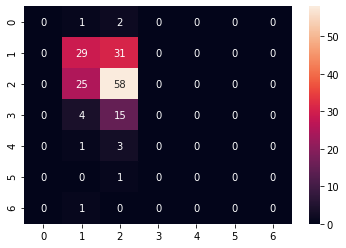

In [ ]:
sns.heatmap(cmn, annot=True)

In [ ]:
print(classification_report(REG_pred.round(), Y_test))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         3
        -0.0       0.48      0.48      0.48        60
         1.0       0.53      0.70      0.60        83
         2.0       0.00      0.00      0.00        19
         3.0       0.00      0.00      0.00         4
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         1

    accuracy                           0.51       171
   macro avg       0.14      0.17      0.15       171
weighted avg       0.42      0.51      0.46       171



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(metrics.accuracy_score(REG_pred.round(), Y_test))

0.5087719298245614


In [ ]:
REG.fit(x_train_scaler, Y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=10, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=500,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
sclaer_reg_pred=REG.predict(x_test_scaler)

In [ ]:
cm = confusion_matrix(sclaer_reg_pred.round(), Y_test)

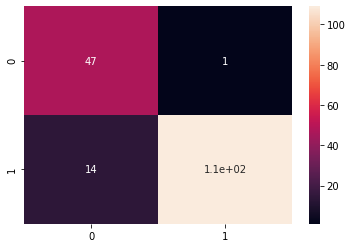

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
print(metrics.accuracy_score(REG_pred.round(), Y_test))

0.5087719298245614


In [ ]:
model_list = ['SVC', 'SVC_scaled', 'KNN', 'K_optimal', 'GaussianNB', 'GaussianNB_scaled', 'random_forest', 'MLPClassifier', 'MLPRegressor']
accuracy_models_list = [0.6491228070175439, 0.8771929824561403, 0.9181286549707602, 0.935672514619883, 0.935672514619883, 0.9122807017543859, 0.9239766081871345, 0.6432748538011696, 0.5087719298245614]

In [ ]:
dict = {'SVC':0.6491228070175439, 'SVC_scaled':0.8771929824561403, 'KNN':0.9181286549707602, 'K_optimal':0.935672514619883, 'GaussianNB':0.935672514619883, 'GaussianNB_scaled':0.9122807017543859, 'random_forest':0.9239766081871345, 'MLPClassifier':0.6432748538011696, 'MLPRegressor':0.5087719298245614}

In [ ]:
pd_df = pd.DataFrame(list(dict.items()))

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

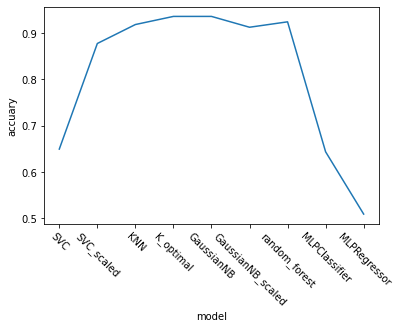

In [ ]:
plt.plot(model_list, accuracy_models_list)
plt.xlabel('model')
plt.ylabel('accuary')
plt.xticks(rotation=-45)

In [ ]:
pd_df.columns=['model_list', 'accuracy_models_list']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

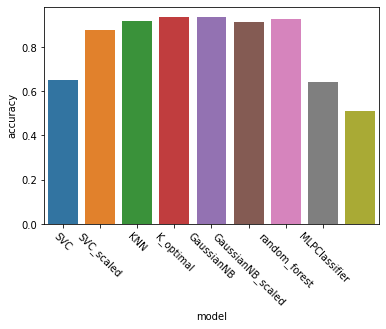

In [ ]:
ax = sns.barplot(pd_df.index, pd_df.accuracy_models_list)
ax.set(xlabel='model', ylabel='accuracy')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7], labels=model_list)
plt.xticks(rotation=-45)